In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import plotly.express as px # Interactive Data Visualization
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline()

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# !pip install cufflinks

In [2]:
# read the CSV file & get its dimensions
telecom_df = pd.read_csv('datasets/telecom_churn.csv')
telecom_df.shape

(5000, 21)

In [3]:
# get the column names
print(telecom_df.columns)

# load top 5 instances
telecom_df.head()

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
# Obtain the summary of the dataframe
print(telecom_df.info())
telecom_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [5]:
# maximum & average daily minutes?
telecom_df.total_day_minutes.describe()

count    5000.000000
mean      180.288900
std        53.894699
min         0.000000
25%       143.700000
50%       180.100000
75%       216.200000
max       351.500000
Name: total_day_minutes, dtype: float64

## Visualizations


c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



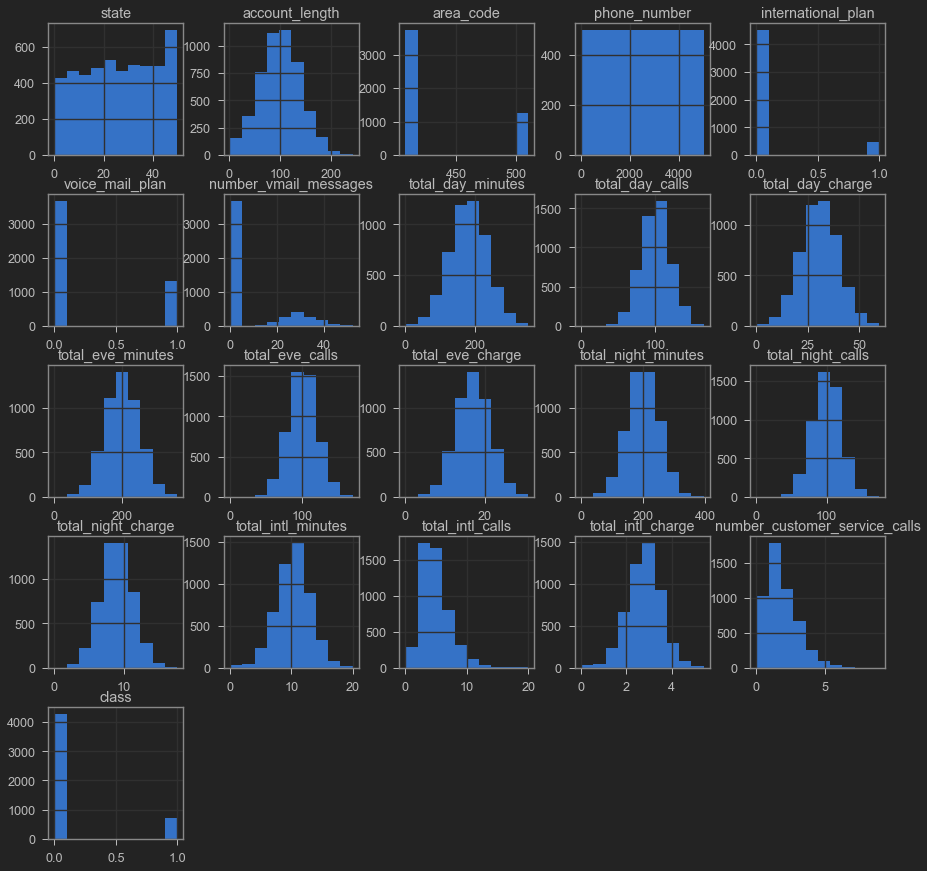

In [6]:
telecom_df.hist(figsize=[15, 15])
plt.show()

In [7]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram
import plotly.graph_objects as go

# prepare the values to plot
labels = ['Retained (0)', 'Not Retained (1)']
values = telecom_df['class'].value_counts().to_list()

# create a donut-shaped representation
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Customer segmentation')
fig.show()

In [8]:
# plot the histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(telecom_df, x='international_plan', color='class')
fig.update_layout(title_text='International Plan (Yes/No) Based on Class (0, 1)')
fig.show()

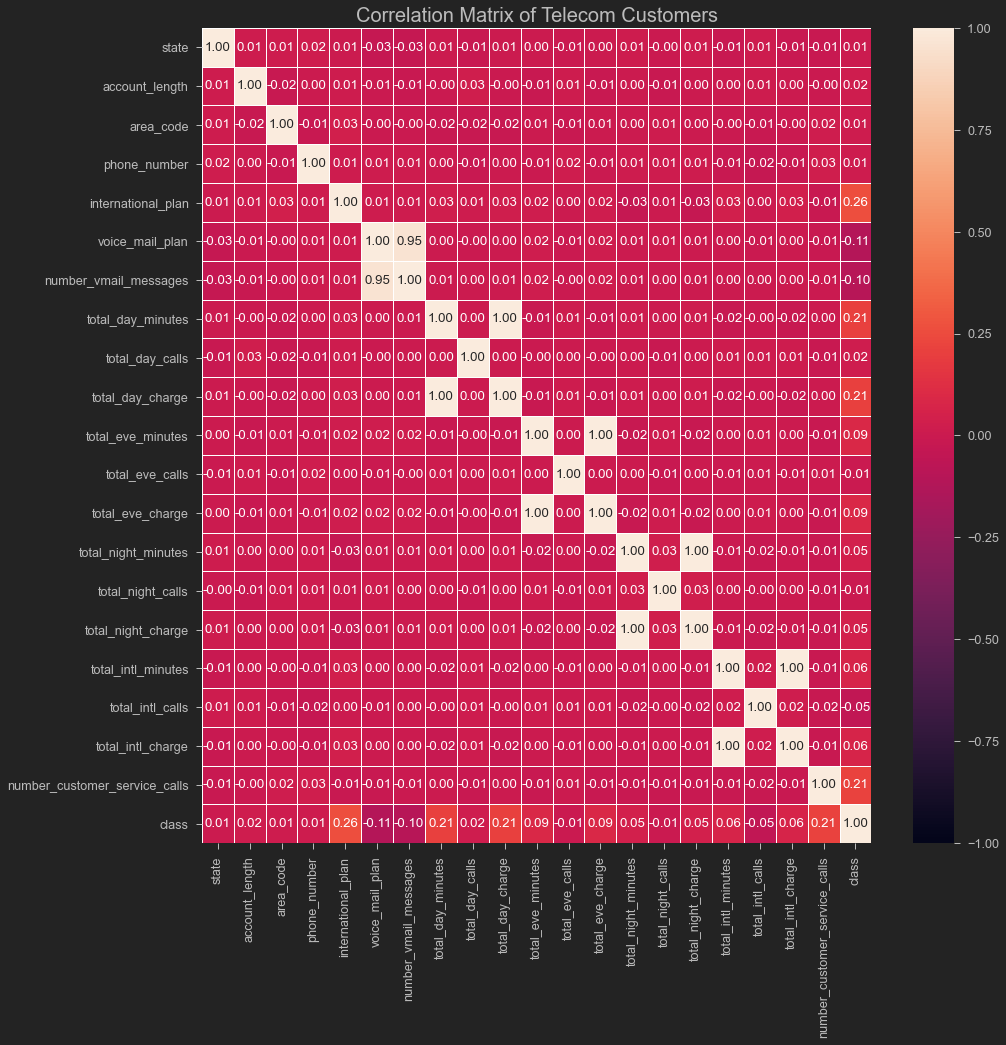

In [9]:
# correlation matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Telecom Customers', fontsize=20)
plt.show()

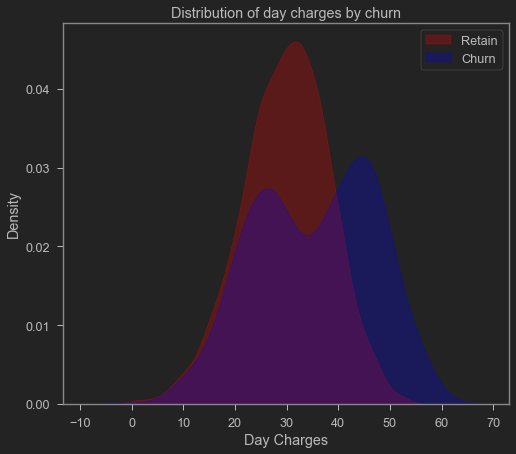

In [10]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 0)],
                 color='Red', shade=True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 1)],
                 color='Blue', shade=True)
ax.legend(['Retain', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Day Charges')
ax.set_title('Distribution of day charges by churn')
plt.show()

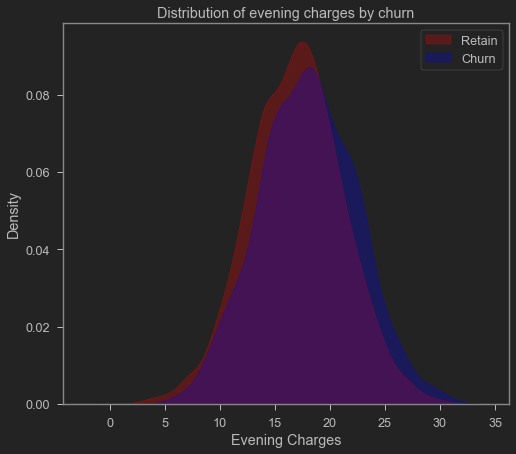

In [11]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class'] == 0)],
                 color='Red', shade=True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class'] == 1)],
                 color='Blue', shade=True)
ax.legend(['Retain', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Evening Charges')
ax.set_title('Distribution of evening charges by churn')
plt.show()

# TO-DO:
1. optimize the above & heatmap
2. add more explanations
3.


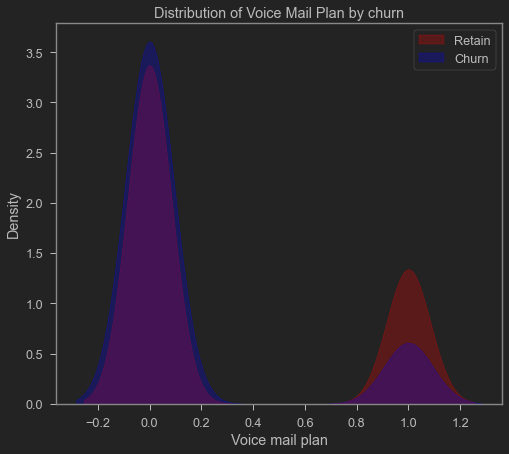

In [12]:
# plot the plotly histogram on voice mail plan correlated with Churn feature
fig = px.histogram(telecom_df, x='voice_mail_plan', color='class')
fig.update_layout(title_text='Voice Mail Plan Over Class')
fig.show()


ax = sns.kdeplot(telecom_df.voice_mail_plan[(telecom_df['class'] == 0)],
                 color='Red', shade=True)
ax = sns.kdeplot(telecom_df.voice_mail_plan[(telecom_df['class'] == 1)],
                 color='Blue', shade=True)
ax.legend(['Retain', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Voice mail plan')
ax.set_title('Distribution of Voice Mail Plan by churn')
plt.show()


# Identify feature importance & prepare the data before model training


In [13]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data.
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(['class', 'area_code', 'phone_number'], axis=1)
y = telecom_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y)

In [14]:
# Logistic regression
log_reg = LogisticRegression(max_iter=10**4).fit(X_train, y_train)
print(f'LogisticRegression train results: {log_reg.score(X_train, y_train)}')
print(f'LogisticRegression test results: {log_reg.score(X_test, y_test)}')

# Support vector classifier
svc = SVC().fit(X_train, y_train)
print(f'SVC train results: {svc.score(X_train, y_train)}')
print(f'SVC test results: {svc.score(X_test, y_test)}')

# Random forest classifier
rfc = RandomForestClassifier().fit(X_train, y_train)
print(f'RandomForestClassifier train results: {rfc.score(X_train, y_train)}')
print(f'RandomForestClassifier test results: {rfc.score(X_test, y_test)}')

# NaiveBayes
gnb = GaussianNB().fit(X_train, y_train)
print(f'GaussianNB train results: {gnb.score(X_train, y_train)}')
print(f'GaussianNB test results: {gnb.score(X_test, y_test)}')

LogisticRegression train results: 0.868
LogisticRegression test results: 0.8688
SVC train results: 0.8650666666666667
SVC test results: 0.8632
RandomForestClassifier train results: 1.0
RandomForestClassifier test results: 0.9576
GaussianNB train results: 0.8741333333333333
GaussianNB test results: 0.8736


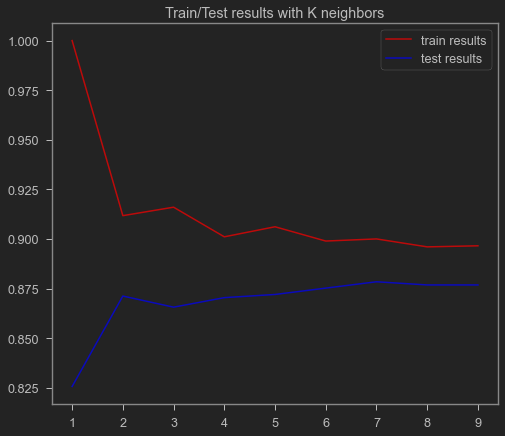

In [15]:
neighbors = np.arange(1, 10)
train_results = []
test_results = []

for idx, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_results.append(knn.score(X_train, y_train))
    test_results.append(knn.score(X_test, y_test))

plt.title('Train/Test results with K neighbors')
plt.plot(neighbors, train_results, color='red', alpha=.7, label='train results')
plt.plot(neighbors, test_results, color='blue', alpha=.7, label='test results')
plt.legend()
plt.show()



In [16]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(f'KNeighborsClassifier train results: {knn.score(X_train, y_train)}')
print(f'KNeighborsClassifier test results: {knn.score(X_test, y_test)}')

KNeighborsClassifier train results: 0.8989333333333334
KNeighborsClassifier test results: 0.8752


## RandomForest to choose the important features


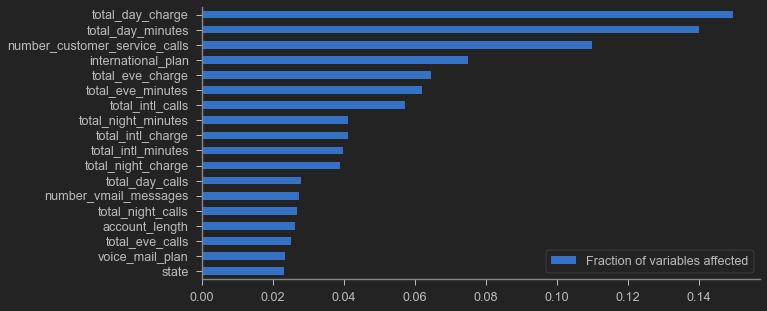

In [17]:
# plot the feature importance

rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
feature_scores = pd.DataFrame({'Fraction of variables affected': rf.feature_importances_}, index=X.columns)
feature_scores = feature_scores.sort_values(by='Fraction of variables affected')
feature_scores.plot(kind='barh', figsize=(10,5))
sns.despine()

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1073
           1       0.58      0.25      0.35       177

    accuracy                           0.87      1250
   macro avg       0.74      0.61      0.64      1250
weighted avg       0.84      0.87      0.85      1250

[[1041   32]
 [ 132   45]]


<AxesSubplot:>

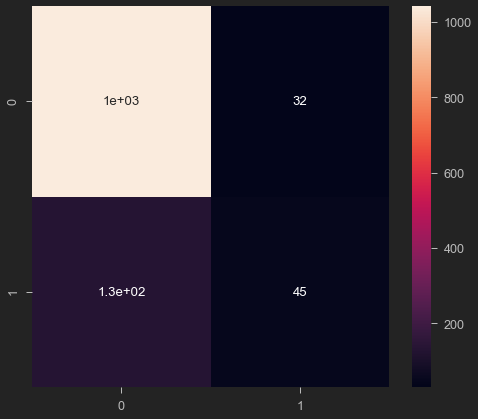

In [18]:
# Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix
"""
precision - the ratio of TP/(TP+FP)
recall    - the ratio of TP/(TP+FN)
F-beta    - weighted harmonic mean of the precision & recall
(F-beta is best at 1, worst at 0)
"""
log_reg = LogisticRegression(max_iter=10**6).fit(X_train, y_train)
print(classification_report(y_test, log_reg.predict(X_test)))
print(confusion_matrix(y_test, log_reg.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, log_reg.predict(X_test)), annot=True)

## SVC


0.8616
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1073
           1       0.53      0.18      0.26       177

    accuracy                           0.86      1250
   macro avg       0.71      0.57      0.59      1250
weighted avg       0.83      0.86      0.83      1250



c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



<AxesSubplot:>

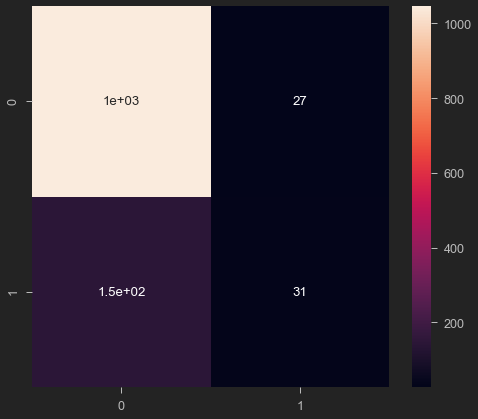

In [19]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter=10**4).fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
print(model_svm.score(X_test, y_test))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.868
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1073
           1       0.53      0.18      0.26       177

    accuracy                           0.86      1250
   macro avg       0.71      0.57      0.59      1250
weighted avg       0.83      0.86      0.83      1250



c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



<AxesSubplot:>

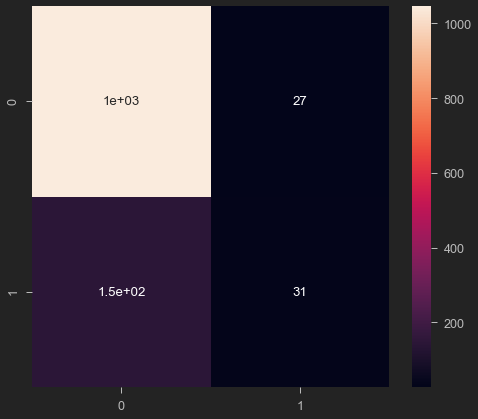

In [20]:
model_calibrated_cv = CalibratedClassifierCV(LinearSVC(max_iter=10**5))
model_calibrated_cv.fit(X_train, y_train)
print(model_calibrated_cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


## RandomForestClassifier

0.9608
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1073
           1       0.97      0.75      0.84       177

    accuracy                           0.96      1250
   macro avg       0.97      0.87      0.91      1250
weighted avg       0.96      0.96      0.96      1250



<AxesSubplot:>

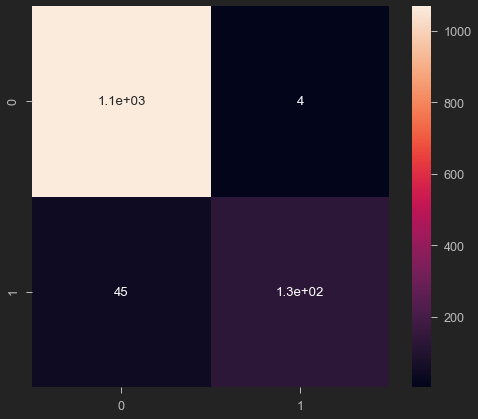

In [23]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(rf.score(X_test, y_test))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [24]:
type(classification_report(y_test, y_pred))


str

# Naive Bayes Classifier



# Plot ROC Curves for 5 models & find AUC scores



In [30]:
print(log_reg.predict_proba(X_test))
print(log_reg.predict_proba(X_test)[:, 1])



[[0.96926736 0.03073264]
 [0.9809874  0.0190126 ]
 [0.46029773 0.53970227]
 ...
 [0.33225631 0.66774369]
 [0.97786387 0.02213613]
 [0.98085568 0.01914432]]
[0.03073264 0.0190126  0.53970227 ... 0.66774369 0.02213613 0.01914432]


array([1.98832802e+00, 9.88328016e-01, 9.01313349e-01, 8.69366120e-01,
       8.12370593e-01, 7.89934267e-01, 7.78321553e-01, 7.50223356e-01,
       7.09024809e-01, 7.04045575e-01, 6.67743691e-01, 6.62395457e-01,
       6.40906722e-01, 6.40175181e-01, 6.36285035e-01, 6.28016227e-01,
       6.27923055e-01, 6.20108200e-01, 6.14211560e-01, 6.12050270e-01,
       6.03397818e-01, 5.87318563e-01, 5.84966163e-01, 5.82538932e-01,
       5.81245344e-01, 5.77358194e-01, 5.65159964e-01, 5.63835341e-01,
       5.62137984e-01, 5.47165064e-01, 5.37212632e-01, 5.36600769e-01,
       5.35841985e-01, 5.26763623e-01, 5.19760170e-01, 5.19741404e-01,
       5.15263453e-01, 5.13474146e-01, 5.12068144e-01, 5.05394773e-01,
       5.04255320e-01, 4.87575798e-01, 4.84358850e-01, 4.82227952e-01,
       4.63853914e-01, 4.46059190e-01, 4.43594584e-01, 4.18848371e-01,
       4.16702396e-01, 4.15076683e-01, 4.08178680e-01, 4.03764368e-01,
       4.00480723e-01, 3.94123241e-01, 3.89885558e-01, 3.75249739e-01,
      

In [34]:
fpr1, tpr1, thresh1 = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_calibrated_cv.predict_proba(X_test)[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1], pos_label=1)

In [35]:
auc_score1 = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_calibrated_cv.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])

print(f'LogisticRegression: {auc_score1}')
print(f'SVM: {auc_score2}')
print(f'RandomForestClassifier: {auc_score3}')
print(f'KNeighborsClassifier: {auc_score4}')
print(f'GaussianNB: {auc_score5}')


LogisticRegression: 0.8269122424587065
SVM: 0.8333412313540893
RandomForestClassifier: 0.9163652255411461
KNeighborsClassifier: 0.6564308317668925
GaussianNB: 0.8480999994734653


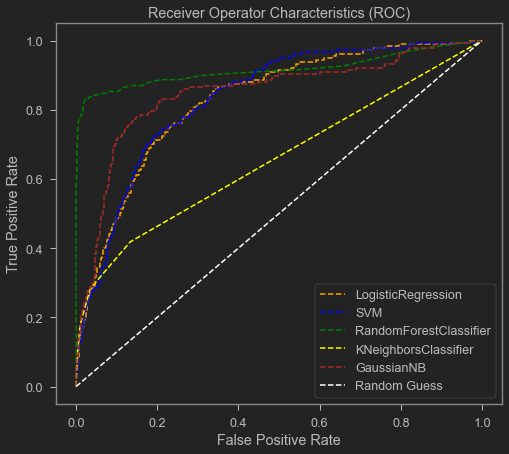

In [38]:
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--', color='blue', label='SVM')
plt.plot(fpr3, tpr3, linestyle='--', color='green', label='RandomForestClassifier')
plt.plot(fpr4, tpr4, linestyle='--', color='yellow', label='KNeighborsClassifier')
plt.plot(fpr5, tpr5, linestyle='--', color='brown', label='GaussianNB')
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), linestyle='--', color='white', label='Random Guess')

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# Check out gridsearch method + adaboost +
